In [175]:
import PyPDF2
import warnings
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')
from nltk.corpus import stopwords
warnings.filterwarnings("ignore",category=DeprecationWarning)
import pandas as pd
import json
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud 
import string

from collections import Counter
import textract   

import re

from nltk.corpus import stopwords, brown
from nltk.tokenize import word_tokenize, sent_tokenize, RegexpTokenizer
from nltk.stem import WordNetLemmatizer
from autocorrect import spell


from notebookjs import execute_js
d3 = "https://d3js.org/d3.v3.min.js"

with open("visualization/template/style.css", "r") as f:
    style = f.read()
    
with open ("./visualization/template/script.js", "r") as f:
    script = f.read()

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\cni4\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\cni4\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\cni4\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [176]:
def import_pdf(file_path):
    filename=file_path
    open_filename= open(filename, 'rb')
    doc = PyPDF2.PdfFileReader(open_filename)
    info = doc.getDocumentInfo()
    pages=doc.numPages
    text=''
    for count in range(pages):
        
        # read page
        doc_page  = doc.getPage(count)
        # Extract the text from the page
        text += doc_page.extractText()
        
        if text != '':
            text = text
        else:
            textract.process(open_filename, method='tesseract', encoding='utf-8', langauge='eng' )  
        
    return text, pages, info

def CleanCount(text,pages):
    punctuation= '''!()[]{};:'"\,<>./?@#$%^&*_-~1234567890'''
    translationTable= str.maketrans("","",punctuation)
    clean = text.translate(translationTable)
    clean = ' '.join( [word.lower() for word in clean.split() if len(word)>1] )

    words = []

    words.extend(clean.split())

    counts = Counter(words)
    
    stop_words = set(stopwords.words('english'))
    
    wordnet_lemmatizer = WordNetLemmatizer()

   
    filtered_words={w:f for w,f in counts.items() if w not in stop_words}
    filtered_words_lem={wordnet_lemmatizer.lemmatize(w):f for w,f in filtered_words.items()}
    return clean, filtered_words,filtered_words_lem
    


In [177]:
filename1 = 'Docs/Numerical_and_Experimental_Investigation_of_Flow.pdf'
filename2 = 'Docs/Paper_SAE_NARDARI_2018-01-1287.pdf'
filename3 = 'Docs/AERO2022_104_C. NARDARI_P.pdf'

In [178]:
text, pages, info=import_pdf(filename1)
words,counts,counts_lem = CleanCount(text,pages)

In [179]:
df2.sort_values(by=['value'],ascending=False).head(20)

,name,value
7,rotor,45
8,noise,43
356,fig,31
57,conﬁned,30
41,ﬂow,29
52,simulations,24
341,unconﬁned,23
121,blade,21
47,chamber,19
1332,vol,19


In [180]:
df2 = pd.DataFrame.from_dict(counts, orient='index')
df2.columns = ['value']
df2.index.name = 'name'
df2.reset_index(inplace=True)
df3 = pd.DataFrame.from_dict(counts_lem, orient='index')
df3.columns = ['value']
df3.index.name = 'name'
df3.reset_index(inplace=True)

In [181]:
execute_js(library_list=[d3, script], main_function="radial_bar", data_dict=df2.sort_values(ascending=False, by=["value"])[:15].to_dict(orient="records"), css_list=[style])

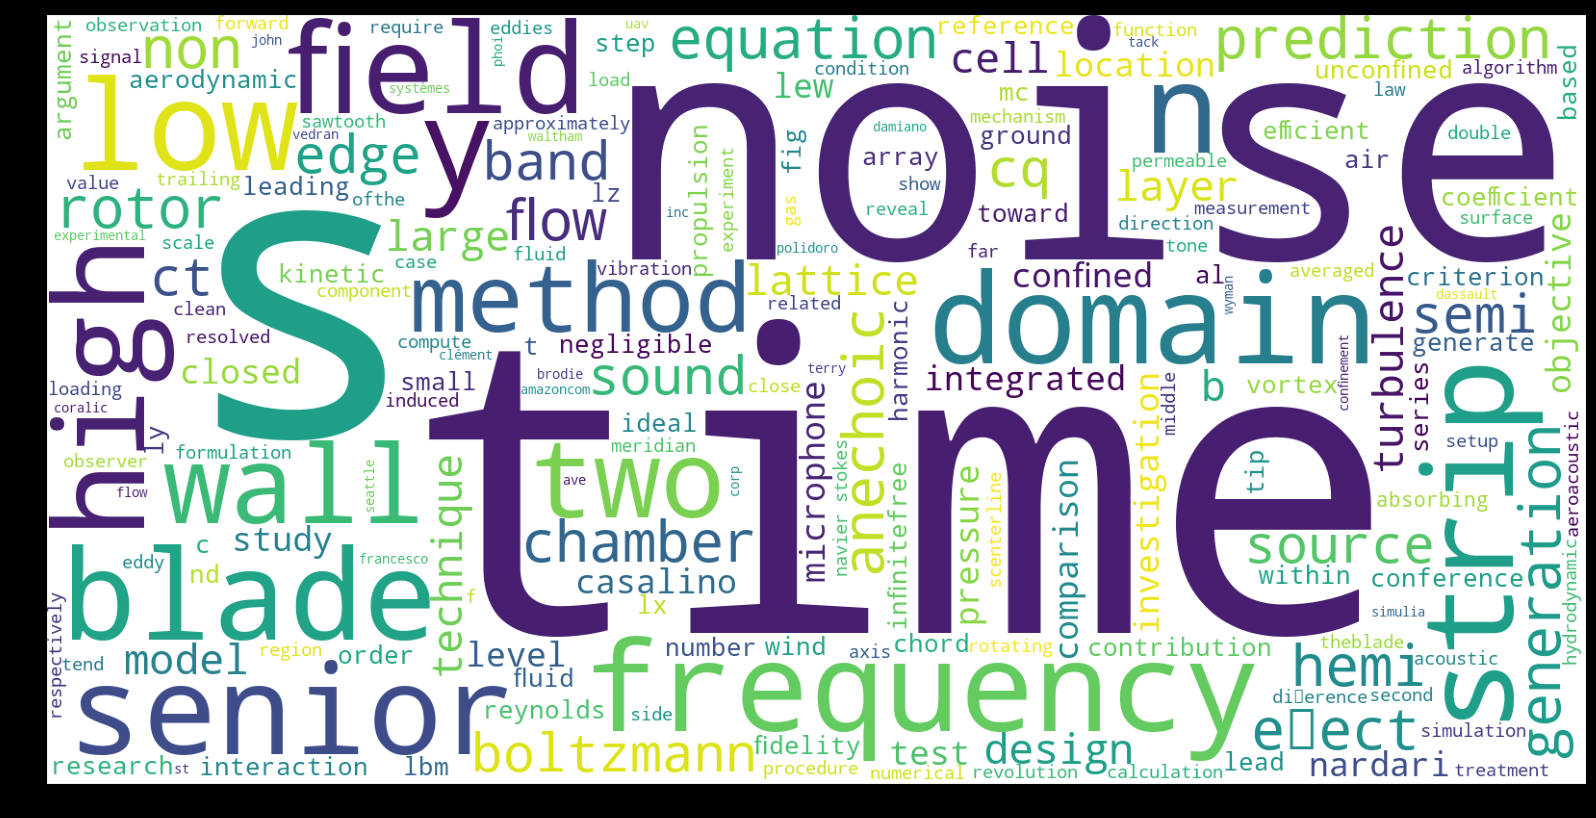

In [182]:
wordcloud = WordCloud(background_color="white",width=1600, height=800,relative_scaling=0).generate(' '.join(df2['name'].tolist()))
plt.figure( figsize=(20,10), facecolor='k')
plt.imshow(wordcloud)

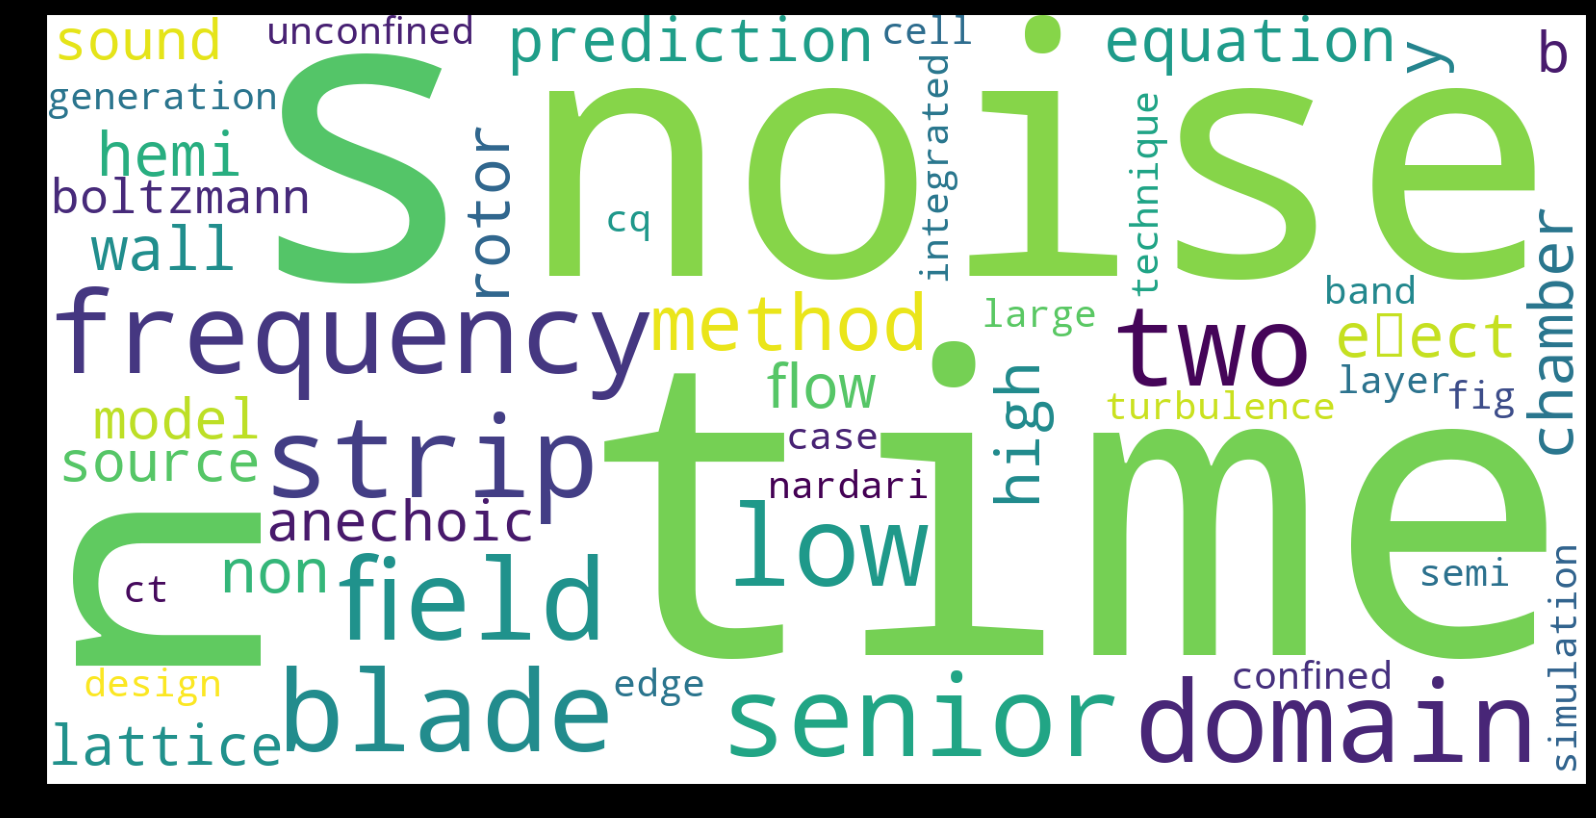

In [190]:
wordcloud = WordCloud(background_color="white",width=1600, height=800,relative_scaling=0,max_words=50).generate(' '.join(df2.sort_values(by=['value'],ascending=False)['name'].tolist()))
plt.figure( figsize=(20,10), facecolor='k')
plt.imshow(wordcloud)

In [184]:
df2.sort_values(by=['value']).shape

(1452, 2)

In [188]:
formatted=[{"Name":w,"Count":f} for w,f in counts.items() if f>5]

In [189]:
def store_json(data,file):
    with open(file, 'w', encoding='utf-8') as f:
            json.dump(data, f, ensure_ascii=False, indent=4)
            print('wrote file: ' + file)
            
store_json(formatted,'filtered_words.json')

wrote file: filtered_words.json
